In [ ]:
# !pip install numpy pandas scipy matplotlib seaborn statsmodels scikit-learn --upgrade

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/MyDrive/Jason/Notebooks
# %cd g:/.shortcut-targets-by-id/1_UrMWiRHhBVY6BmkXpUmghuXVDupcUm8/Jason/Notebooks

# Load

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(
    context='notebook',
    style='whitegrid',
)

cm = 1/2.54

In [2]:
df = pd.read_excel('../Datasets/Medical Cost Personal.xlsx')
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1144,52,male,26.400,3,no,southeast,25992.82
297,25,female,24.300,3,no,southwest,4391.65
604,50,male,36.200,0,no,southwest,8457.82
1030,30,male,24.400,3,yes,southwest,18259.22
429,33,male,29.400,4,no,southwest,6059.17
314,34,male,34.675,0,no,northeast,4518.83
224,18,female,38.665,2,no,northeast,3393.36
894,59,male,25.460,1,no,northeast,12913.99
9,18,male,53.130,0,no,southeast,1163.46
240,25,female,22.515,1,no,northwest,3594.17


# EDA

## Null

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Duplicate

In [4]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
41,19,male,30.59,0,no,northwest,1639.56
42,19,male,30.59,0,no,northwest,1639.56


## Target

#### `charges`

Individual medical costs billed by health insurance

In [8]:
index = ['variance', 'skewness', 'kurtosis']
df_selected = df[['charges']]
columns = df_selected.columns

with pd.option_context('display.float_format', lambda x: '%.6f' % x, 'styler.format.thousands', ','):
    display(pd.concat([
        df_selected.describe(),
        pd.DataFrame(stats.describe(df_selected)[3:], index=index, columns=columns),
    ]))

,charges
count,1338.000000
mean,13270.422444
std,12110.011241
min,1121.870000
25%,4740.287500
50%,9382.030000
75%,16639.915000
max,63770.430000
variance,146652372.253845
skewness,1.514180


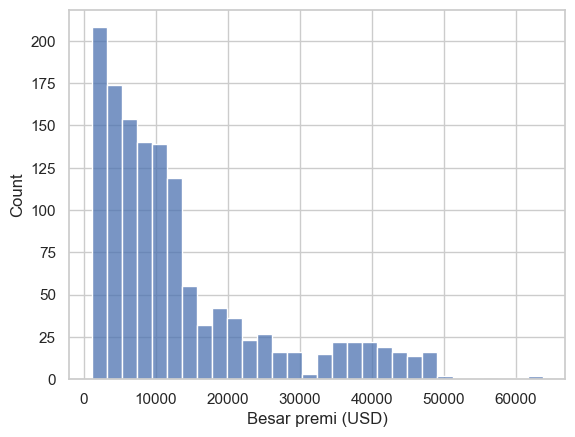

In [10]:
kwargs = {
    'data': df,
    'x': 'charges',
    'discrete': False,
    'bins': 'auto',
}

sns.histplot(**kwargs, log_scale=[False, False])

plt.xlabel('Besar premi (USD)')

plt.show()

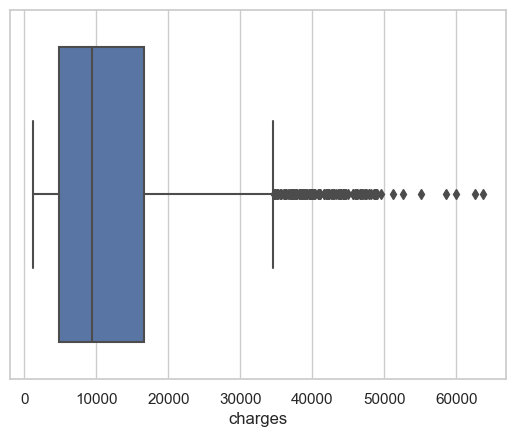

In [11]:
kwargs = {
    'data': df,
    'x': 'charges',
}

sns.boxplot(**kwargs)

plt.show()

## Feature

### Numerical

#### `age`

age of primary beneficiary

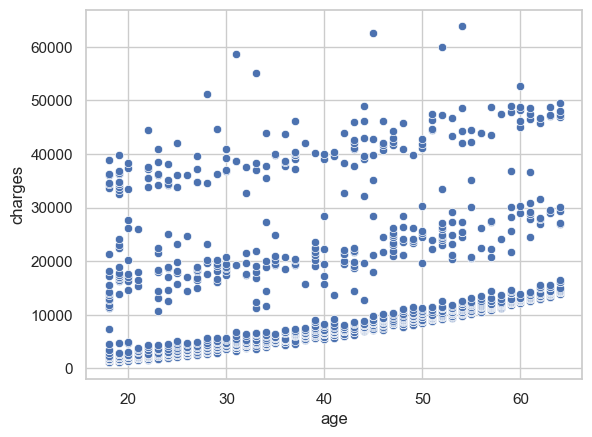

In [14]:
x = 'age'

sns.scatterplot(data=df, x=x, y='charges')

plt.show()

#### `bmi`

Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

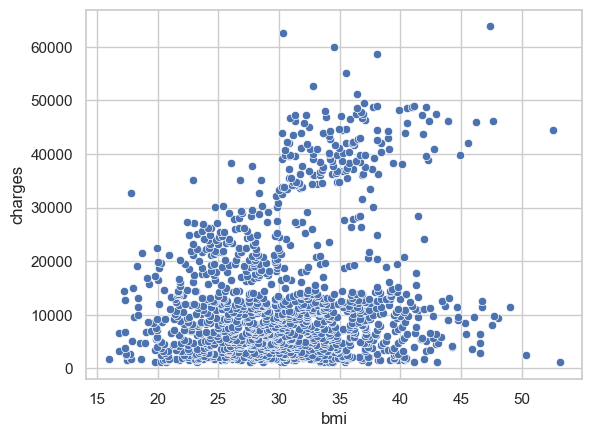

In [15]:
x = 'bmi'

sns.scatterplot(data=df, x=x, y='charges')

plt.show()

Binning according to Weir & Jan (2022).

In [16]:
bins = [-np.inf, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]
labels = ['underweight', 'normal', 'overweight', 'class I obese', 'class II obese', 'class III obese']

ser_binned_bmi = pd.cut(df['bmi'], bins=bins, labels=labels)
ser_binned_bmi.value_counts().sort_index()

underweight         21
normal             221
overweight         380
class I obese      397
class II obese     226
class III obese     93
Name: bmi, dtype: int64

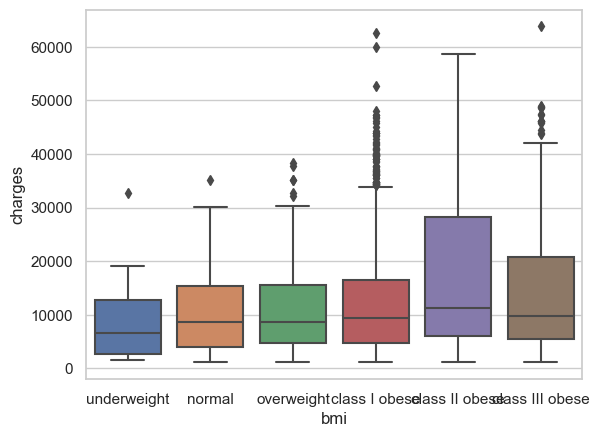

In [17]:
sns.boxplot(data=df, x=ser_binned_bmi, y='charges')

plt.show()

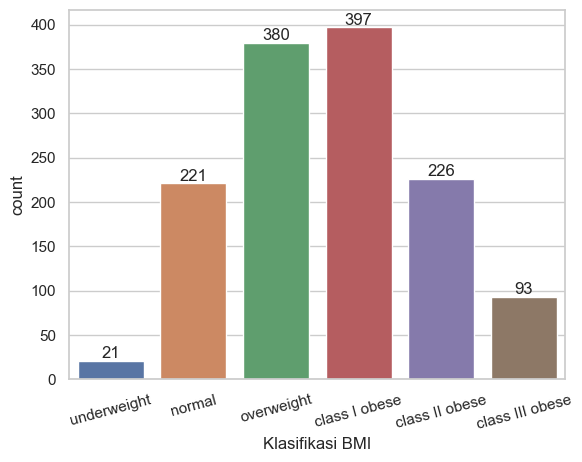

In [18]:
bins = [-np.inf, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]
labels = ['underweight', 'normal', 'overweight', 'class I obese', 'class II obese', 'class III obese']

ser_binned_bmi = pd.cut(df['bmi'], bins=bins, labels=labels)

ax = sns.countplot(data=df, x=ser_binned_bmi)
ax.bar_label(ax.containers[0])

plt.xlabel('Klasifikasi BMI')
plt.xticks(rotation=15)

plt.show()

In [19]:
pd.concat([ser_binned_bmi, df['charges']], axis=1).groupby('bmi').mean()

,charges
bmi,
underweight,8657.621429
normal,10404.900181
overweight,11006.809974
class I obese,14217.617229
class II obese,17245.410575
class III obese,16667.608817


#### `children`

Number of children covered by health insurance / Number of dependents

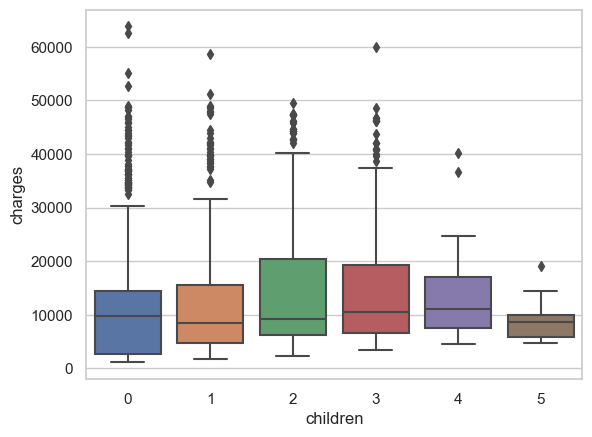

In [20]:
x = 'children'

sns.boxplot(data=df, x=x, y='charges')

plt.show()

In [44]:
print(df[['children', 'charges']].groupby('children').mean())

               charges
children              
0         12365.975801
1         12731.171852
2         15073.564000
3         15355.318599
4         13850.656800
5          8786.035556


### Categorical

In [19]:
df.describe(include=[object])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


#### `sex`

insurance contractor gender, female, male

In [20]:
df['sex'].value_counts().sort_index()

female    662
male      676
Name: sex, dtype: int64

In [24]:
df[['charges', 'sex']].groupby('sex').agg(['mean', 'std'])

charges              
                mean           std
sex                               
female  12569.578927  11128.703839
male    13956.751450  12971.025881

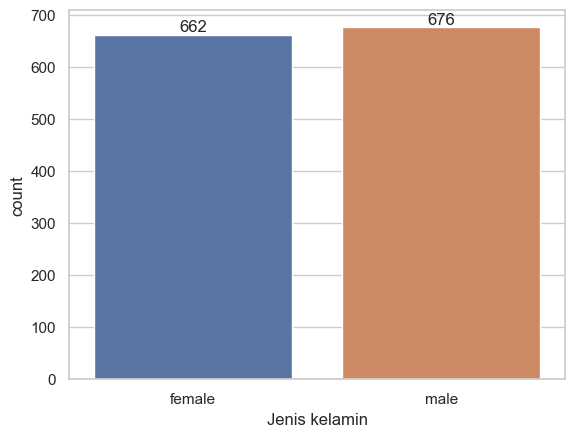

In [7]:
kwargs = {
    'data': df,
    'x': 'sex',
}

order = np.sort(df[kwargs['x']].unique())

rc = {
    'figure.figsize': [15*cm, 9*cm],
    'figure.dpi': 600,
}
with plt.rc_context(rc=None):
    ax =sns.countplot(**kwargs, order=order)
    ax.bar_label(ax.containers[0])

    plt.xlabel('Jenis kelamin')
    plt.xticks(rotation=0)

    plt.show()

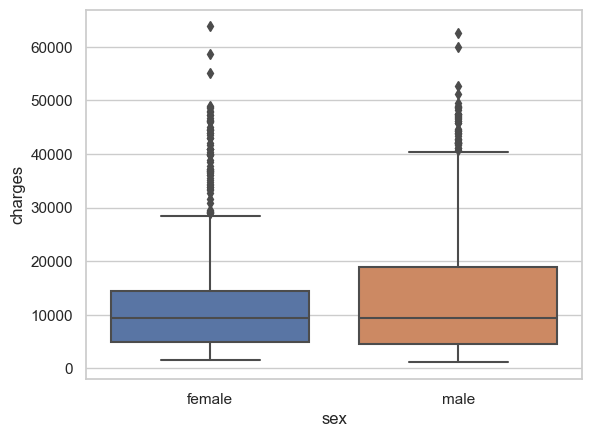

In [28]:
sns.boxplot(data=df, x='sex', y='charges', order=order)
plt.show()

#### `smoker`

Smoking

In [31]:
df['smoker'].value_counts().sort_index()

no     1064
yes     274
Name: smoker, dtype: int64

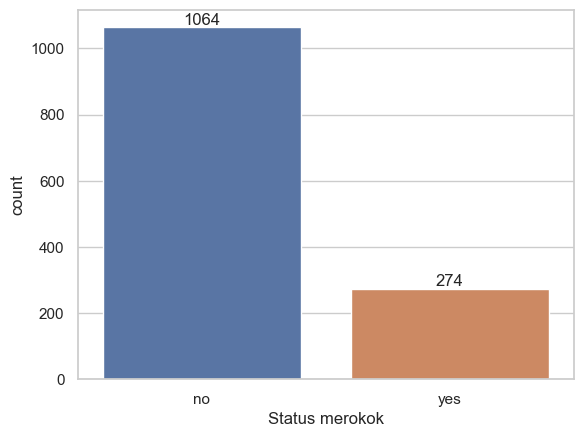

In [13]:
kwargs = {
    'data': df,
    'x': 'smoker',
}

rc = {
    'figure.figsize': [15*cm, 9*cm],
    'figure.dpi': 600,
}
with plt.rc_context(rc=None):
    ax = sns.countplot(**kwargs)
    ax.bar_label(ax.containers[0])

    plt.xlabel('Status merokok')
    plt.xticks(rotation=0)

    plt.show()

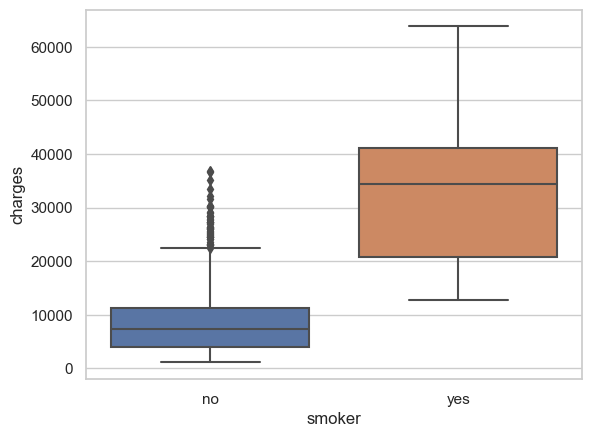

In [33]:
kwargs = {
    'data': df,
    'x': 'smoker',
    'y': 'charges',
}

order = np.sort(df[kwargs['x']].unique())

sns.boxplot(**kwargs, order=order)
plt.show()

In [46]:
print(df[['smoker', 'charges']].groupby('smoker').mean())

             charges
smoker              
no       8434.268487
yes     32050.231971


#### `region`

the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

In [34]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

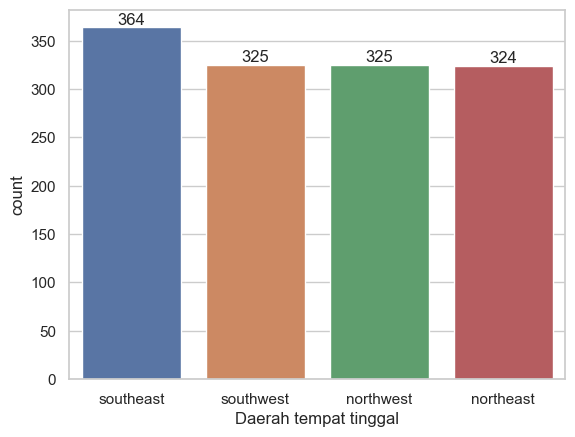

In [14]:
kwargs = {
    'data': df,
    'x': 'region',
}

order = df[kwargs['x']].value_counts().index

rc = {
    'figure.figsize': [15*cm, 9*cm],
    'figure.dpi': 600,
}
with plt.rc_context(rc=None):
    ax = sns.countplot(**kwargs, order=order)
    ax.bar_label(ax.containers[0])
    
    plt.xlabel('Daerah tempat tinggal')
    plt.xticks(rotation=0)

    plt.show()

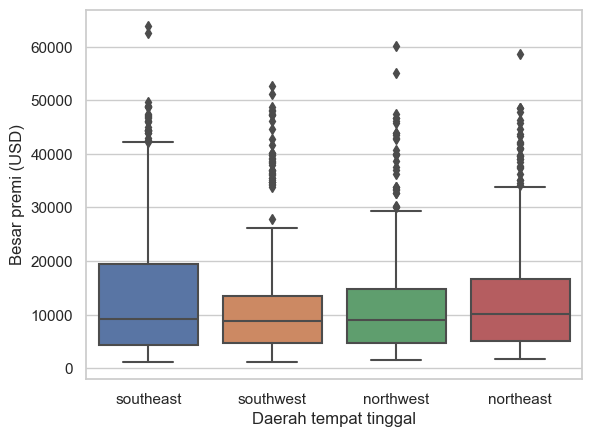

In [20]:
kwargs = {
    'data': df,
    'x': 'region',
    'y': 'charges',
}

rc = {
    'figure.figsize': [15*cm, 9*cm],
    'figure.dpi': 600,
}
with plt.rc_context(rc=None):
    ax = sns.boxplot(**kwargs, order=order)
    
    plt.ylabel('Besar premi (USD)')
    plt.xlabel('Daerah tempat tinggal')
    plt.xticks(rotation=0)

    plt.show()

In [47]:
df[['charges', 'region']].groupby('region').mean()

,charges
region,
northeast,13406.384753
northwest,12417.575231
southeast,14735.411538
southwest,12346.937908


# Modeling

In [21]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(
    context='notebook',
    style='whitegrid',
)

# df = pd.read_excel('../Datasets/Medical Cost Personal.xlsx')
df = pd.read_csv('../Datasets/Shuffled Medical Cost Personal.csv')

cm = 1/2.54
random_state = 42

## ML

### Random Forest with bmi3 (binned accoding to Weir & Jan (2022))

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split

# Binning
y = df['charges']
X = (
    df.assign(bmi3=lambda df: pd.cut(df['bmi'], bins=bins, labels=labels))
    .drop(columns=['charges', 'bmi2', 'bmi'])
)

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=False)

# Categorical transformer
transformer = make_column_transformer(
    (
        OneHotEncoder(drop='if_binary'),
        make_column_selector(dtype_exclude='number')
    ),
    remainder='passthrough'
)

#### Base Model

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

rfr = RandomForestRegressor(
    n_estimators=100,
    random_state=random_state,
)

reg = make_pipeline(transformer, rfr)

In [33]:
reg.fit(X_train, y_train)

# Training
y_pred = reg.predict(X_train)
train_score = metrics.mean_squared_error(y_train, y_pred, squared=False)
print(f"RMSE Training: {train_score}")

# Cross validation
cv_score = -cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_root_mean_squared_error').mean()
print(f"RMSE CV: {cv_score}")

RMSE Training: 2066.746662342125
RMSE CV: 4939.025862502483


#### Hyperparameter Tuning

##### Number of Trees

In [ ]:
from sklearn.model_selection import GridSearchCV

n_trees = np.arange(50, 1010, 50)

rfr = RandomForestRegressor(
    random_state=random_state,
    n_jobs=-1,
)

gscv = GridSearchCV(rfr, param_grid={'n_estimators': n_trees},
                   cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)

reg = make_pipeline(transformer, gscv)
reg.fit(X_train, y_train)

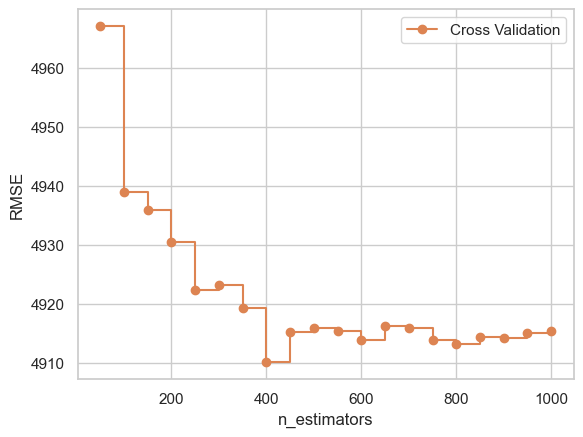

In [39]:
rc = {
    'figure.figsize': (12*cm, 8*cm),
    'figure.dpi': 600,
    }

with plt.rc_context(
    # rc=rc,
    rc=None,
    ):
    plt.plot(n_trees, -reg[1].cv_results_['mean_test_score'],
             color='C1', marker="o",
             label="Cross Validation", drawstyle="steps-post")
    plt.legend(loc='best')
    plt.xlabel('n_estimators')
    plt.ylabel('RMSE')
    plt.show()

Chosen: 400

##### Pruning

In [40]:
from sklearn.model_selection import GridSearchCV
N_TREES = 400

rc = {
    'figure.figsize': (12*cm, 8*cm),
    'figure.dpi': 600,
    }


def plot_ccp_alphas(reg, rc=None):
    with plt.rc_context(rc=rc):
        plt.plot(
            reg[1].cv_results_['param_ccp_alpha'].compressed() / 1e3,
            -reg[1].cv_results_['mean_test_score'],
            color='C1',
            marker="o",
            label="Cross Validation",
            drawstyle="steps-post"
            )
        plt.legend(loc='best')
        plt.xlabel('Cost-Complexity Parameter, $\\alpha$ (1000)')
        plt.ylabel('RMSE')
        plt.show()
        
    return None


def check_ccp_alphas(ccp_alphas, rc=None):
    rfr = RandomForestRegressor(
        n_estimators=N_TREES,
        n_jobs=-1,
        random_state=random_state
        )
    
    gscv = GridSearchCV(
        rfr,
        {'ccp_alpha': ccp_alphas},
        scoring='neg_root_mean_squared_error',
        n_jobs=-1,
        refit=False,
        cv=10,
        )
    
    reg = make_pipeline(transformer, gscv)
    
    reg.fit(X_train, y_train)
    
    plot_ccp_alphas(reg, rc=rc)
        
    return reg

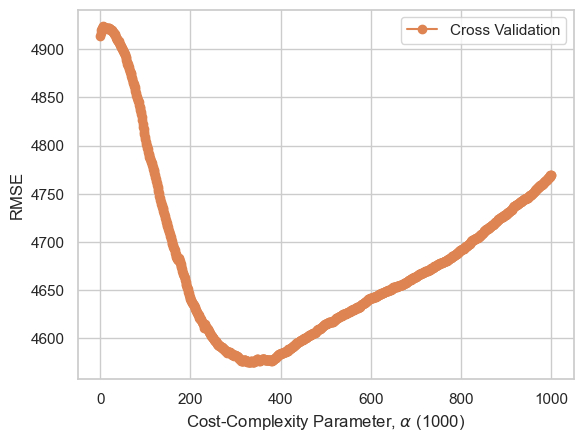

In [58]:
ccp_alphas = np.linspace(0.0*1e6, 1*1e6, 1000+1, endpoint=True)

reg = check_ccp_alphas(ccp_alphas, rc=None)

# pd.DataFrame(reg.cv_results_).to_csv('ccp_alphas.csv', index=False)

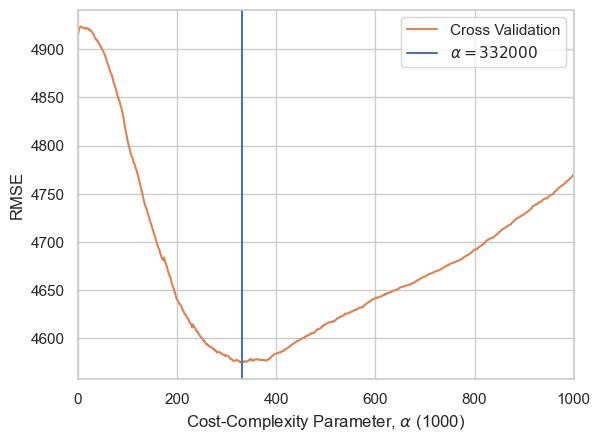

In [25]:
df_reg = pd.read_csv('ccp_alphas.csv')

x = df_reg['param_ccp_alpha'] / 1e3
y = -df_reg['mean_test_score']
idxmin = df_reg['rank_test_score'].idxmin()

with plt.rc_context(rc=None):
    plt.plot(x, y, '-', color='C1', label="Cross Validation")
    
    plt.axvline(x[idxmin], color='C0',
                label=f"$\\alpha={df_reg.loc[idxmin, 'param_ccp_alpha']:.0f}$")
    
    plt.legend(loc='best')
    plt.xlim(x.min(), x.max())
    plt.xlabel('Cost-Complexity Parameter, $\\alpha$ (1000)')
    plt.ylabel('RMSE')
    plt.show()

In [26]:
CCP_ALPHA = df_reg.loc[idxmin, 'param_ccp_alpha']
CCP_ALPHA

332000.0

#### Creating Final Model and Evaluation

In [41]:
N_TREES = 400
CCP_ALPHA = 332000.0

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

y = df['charges']
X = (
    df.assign(bmi3=lambda df: pd.cut(df['bmi'], bins=bins, labels=labels))
    .drop(columns=['charges', 'bmi2', 'bmi'])
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

transformer = make_column_transformer(
    (OneHotEncoder(drop='if_binary'), make_column_selector(dtype_exclude='number')),
    remainder='passthrough'
)

rfr = RandomForestRegressor(
    n_estimators=N_TREES,
    ccp_alpha=CCP_ALPHA,
    n_jobs=-1,
    random_state=random_state,
)

reg = make_pipeline(transformer, rfr)

In [43]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_train)
test_score = metrics.mean_squared_error(y_train, y_pred, squared=False)
print(f"Train RMSE: {test_score}")

cv_score = cross_val_score(reg, X_train, y_train, cv=10,
                           scoring='neg_root_mean_squared_error')
print(f"CV RMSE: {-cv_score.mean()}")

Train RMSE: 3991.995937684294
CV RMSE: 4573.884777864932


##### Feature Importance

In [45]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    reg,
    X_train,
    y_train,
    n_repeats=10,
    scoring='neg_root_mean_squared_error',
    random_state=random_state,
    n_jobs=-1
)

forest_importances = (
    pd.DataFrame({'importance': result.importances_mean,
                  'feature': reg.feature_names_in_})
    .assign(importance=lambda df: df['importance'] / df['importance'].sum())
    .sort_values('importance', ascending=False),
)[0]

forest_importances

,importance,feature
3,0.614504,smoker
5,0.201534,bmi3
0,0.152422,age
2,0.020691,children
4,0.009343,region
1,0.001507,sex


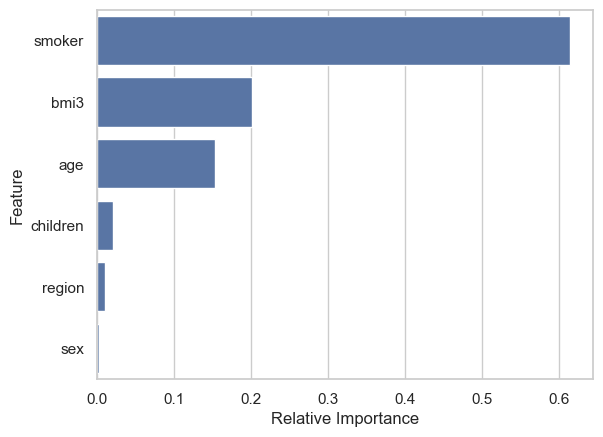

In [47]:
rc = {
    'figure.figsize': (12*cm, 8*cm),
    'figure.dpi': 600,
}

with plt.rc_context(
    # rc=rc,
    rc=None,
    ):
    sns.barplot(x=forest_importances['importance'],
                y=forest_importances['feature'], color='C0')

    plt.xlabel('Relative Importance')
    plt.ylabel('Feature')

    plt.show()

In [48]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
test_score = metrics.mean_squared_error(y_test, y_pred, squared=False)
test_score

5030.6471190985285